In [1]:
import numpy, random, math
import matplotlib.pyplot as plt

In [2]:
# Генерация значений распределения
def erlang_spec(k, L):
    values = []
    for i in range(k):
        values.append(-1 * numpy.log(random.uniform(0, 1)) / L)
    return sum(values)

In [6]:
def flow_intensity_estimate(N):
    N_List = []
    L_List = []
    V_List = []
    t = 0 # Время моделирования
    k = 0 # Счётчик
    Lo = 9999999999 # Старая величина интенсивности L
    Vo = 9999999999 # Старая величина вариации V
    while True:
        u_list = [] # Список значений Uk
        while k<N:
            k = k+1
            Uk = erlang_spec(4, 20) # Случайное число, распределённое по заданному закону
            t = t + Uk
            u_list.append(Uk)
        Mu = t/N # Мат. ожидание
        sum_in_SKO = 0
        for u in u_list:
            sum_in_SKO += (u - Mu) ** 2
        SKO = math.sqrt((1 / (N - 1)) * sum_in_SKO) # Среднеквадратическое отклонение
        Ln = 1/Mu
        Vn = SKO/Mu
        N_List.append(N)
        L_List.append(Ln)
        V_List.append(Vn)
        if (abs((Ln - Lo) / Lo) > 0.01) or (abs((Vn - Vo) / Vo) > 0.01):
            Lo = Ln # Новая величина L
            Vo = Vn # Новая величина V
            t = 0
            k = 0
            N = 2*N
        else:
            return Ln, Vn, N_List, L_List, V_List

4.992421468076497 0.50150647113711


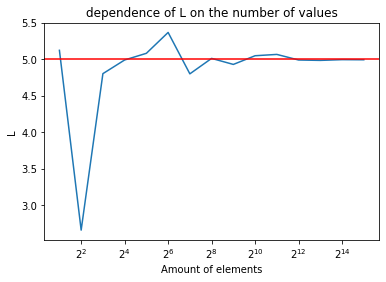

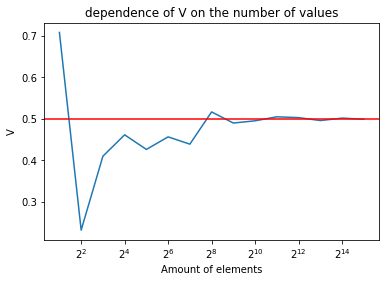

In [8]:
L, N, N_List, L_List, V_List = flow_intensity_estimate(10000)
print(L, N)

L, N, N_List, L_List, V_List = flow_intensity_estimate(2)

plt.plot(N_List, L_List)
plt.xscale('log', base=2)
plt.axhline(y=5, color='red')
plt.title('dependence of L on the number of values')
plt.xlabel('Amount of elements')
plt.ylabel('L')
plt.show()

plt.plot(N_List, V_List)
plt.xscale('log', base=2)
plt.axhline(y=0.5, color='red')
plt.title('dependence of V on the number of values')
plt.xlabel('Amount of elements')
plt.ylabel('V')
plt.show()